In [25]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [26]:
IMAGE_SIZE = [224,224]

In [27]:
train_path='/content/drive/MyDrive/AI/DL/VGG16/Train'
test_path='/content/drive/MyDrive/AI/DL/VGG16/Test'

In [28]:
vgg = VGG19(input_shape=IMAGE_SIZE+[3], weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [29]:
for layer in vgg.layers:
  layer.trainable = False

In [30]:
folders = glob(train_path+'/*')
folders

['/content/drive/MyDrive/AI/DL/VGG16/Train/cats',
 '/content/drive/MyDrive/AI/DL/VGG16/Train/dogs']

In [31]:
x = Flatten()(vgg.output)

In [32]:
prediction = Dense(len(folders), activation='softmax')(x)

In [33]:
model = Model(inputs=vgg.input, outputs=prediction)

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [35]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_set = train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 208 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [39]:
r = model.fit_generator(train_set,validation_data=test_set,epochs=20,steps_per_epoch=len(train_set),validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
7/7 [==============================] - 140s 21s/step - loss: 0.7631 - accuracy: 0.6175 - val_loss: 0.5345 - val_accuracy: 0.7308
Epoch 2/20
7/7 [==============================] - 84s 12s/step - loss: 0.4625 - accuracy: 0.7406 - val_loss: 0.3236 - val_accuracy: 0.8269
Epoch 3/20
7/7 [==============================] - 83s 13s/step - loss: 0.3229 - accuracy: 0.8381 - val_loss: 0.6981 - val_accuracy: 0.6538
Epoch 4/20
7/7 [==============================] - 83s 12s/step - loss: 0.3343 - accuracy: 0.8404 - val_loss: 0.3095 - val_accuracy: 0.8846
Epoch 5/20
7/7 [==============================] - 82s 12s/step - loss: 0.2029 - accuracy: 0.9084 - val_loss: 0.4084 - val_accuracy: 0.7692
Epoch 6/20
7/7 [==============================] - 81s 12s/step - loss: 0.2558 - accuracy: 0.8956 - val_loss: 0.6559 - val_accuracy: 0.6923
Epoch 7/20
7/7 [==============================] - 79s 12s/step - loss: 0.1730 - accuracy: 0.9156 - val_loss: 0.2640 - val_accuracy: 0.8846
Epoch 8/20
7/7 [==========

In [40]:
import matplotlib.pyplot as plt

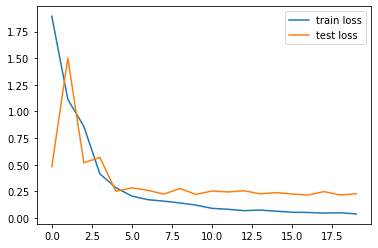

In [41]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

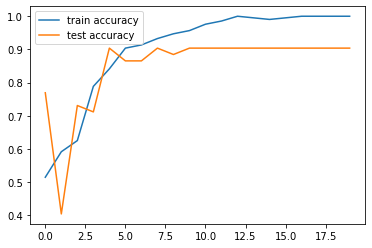

In [42]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

In [43]:
model.save('vgg19.h5')